In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv("heart.csv")

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.shape

(303, 14)

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observation:

1.It is observed that there is a significant difference in between 75% and maximum in "chol","oldpeak" and "ca" column so there might be a chance of presence of outliers.

2.There is a maximum std deviation in "chol".

In [21]:
#checking the missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Observation:

There is no missing values in the data

In [22]:
# Checking the correlation in between the attributes

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


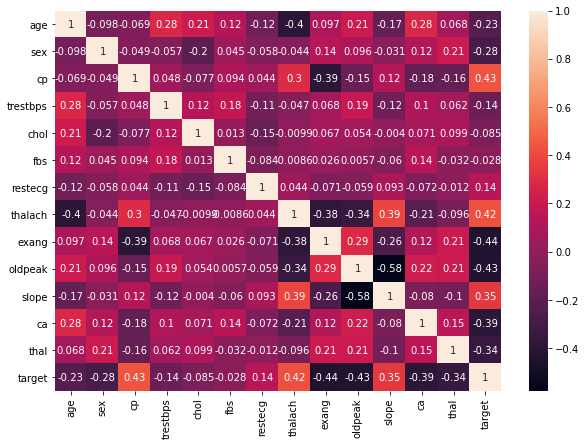

In [23]:
#Visualization of correlation in between the attributes
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

Observation:

1.There is a positive correlation between target and cp,thalach,slope.

2.There is a negative correlation between target and sex,exang,ca,thai,oldpeak

<Figure size 720x504 with 0 Axes>

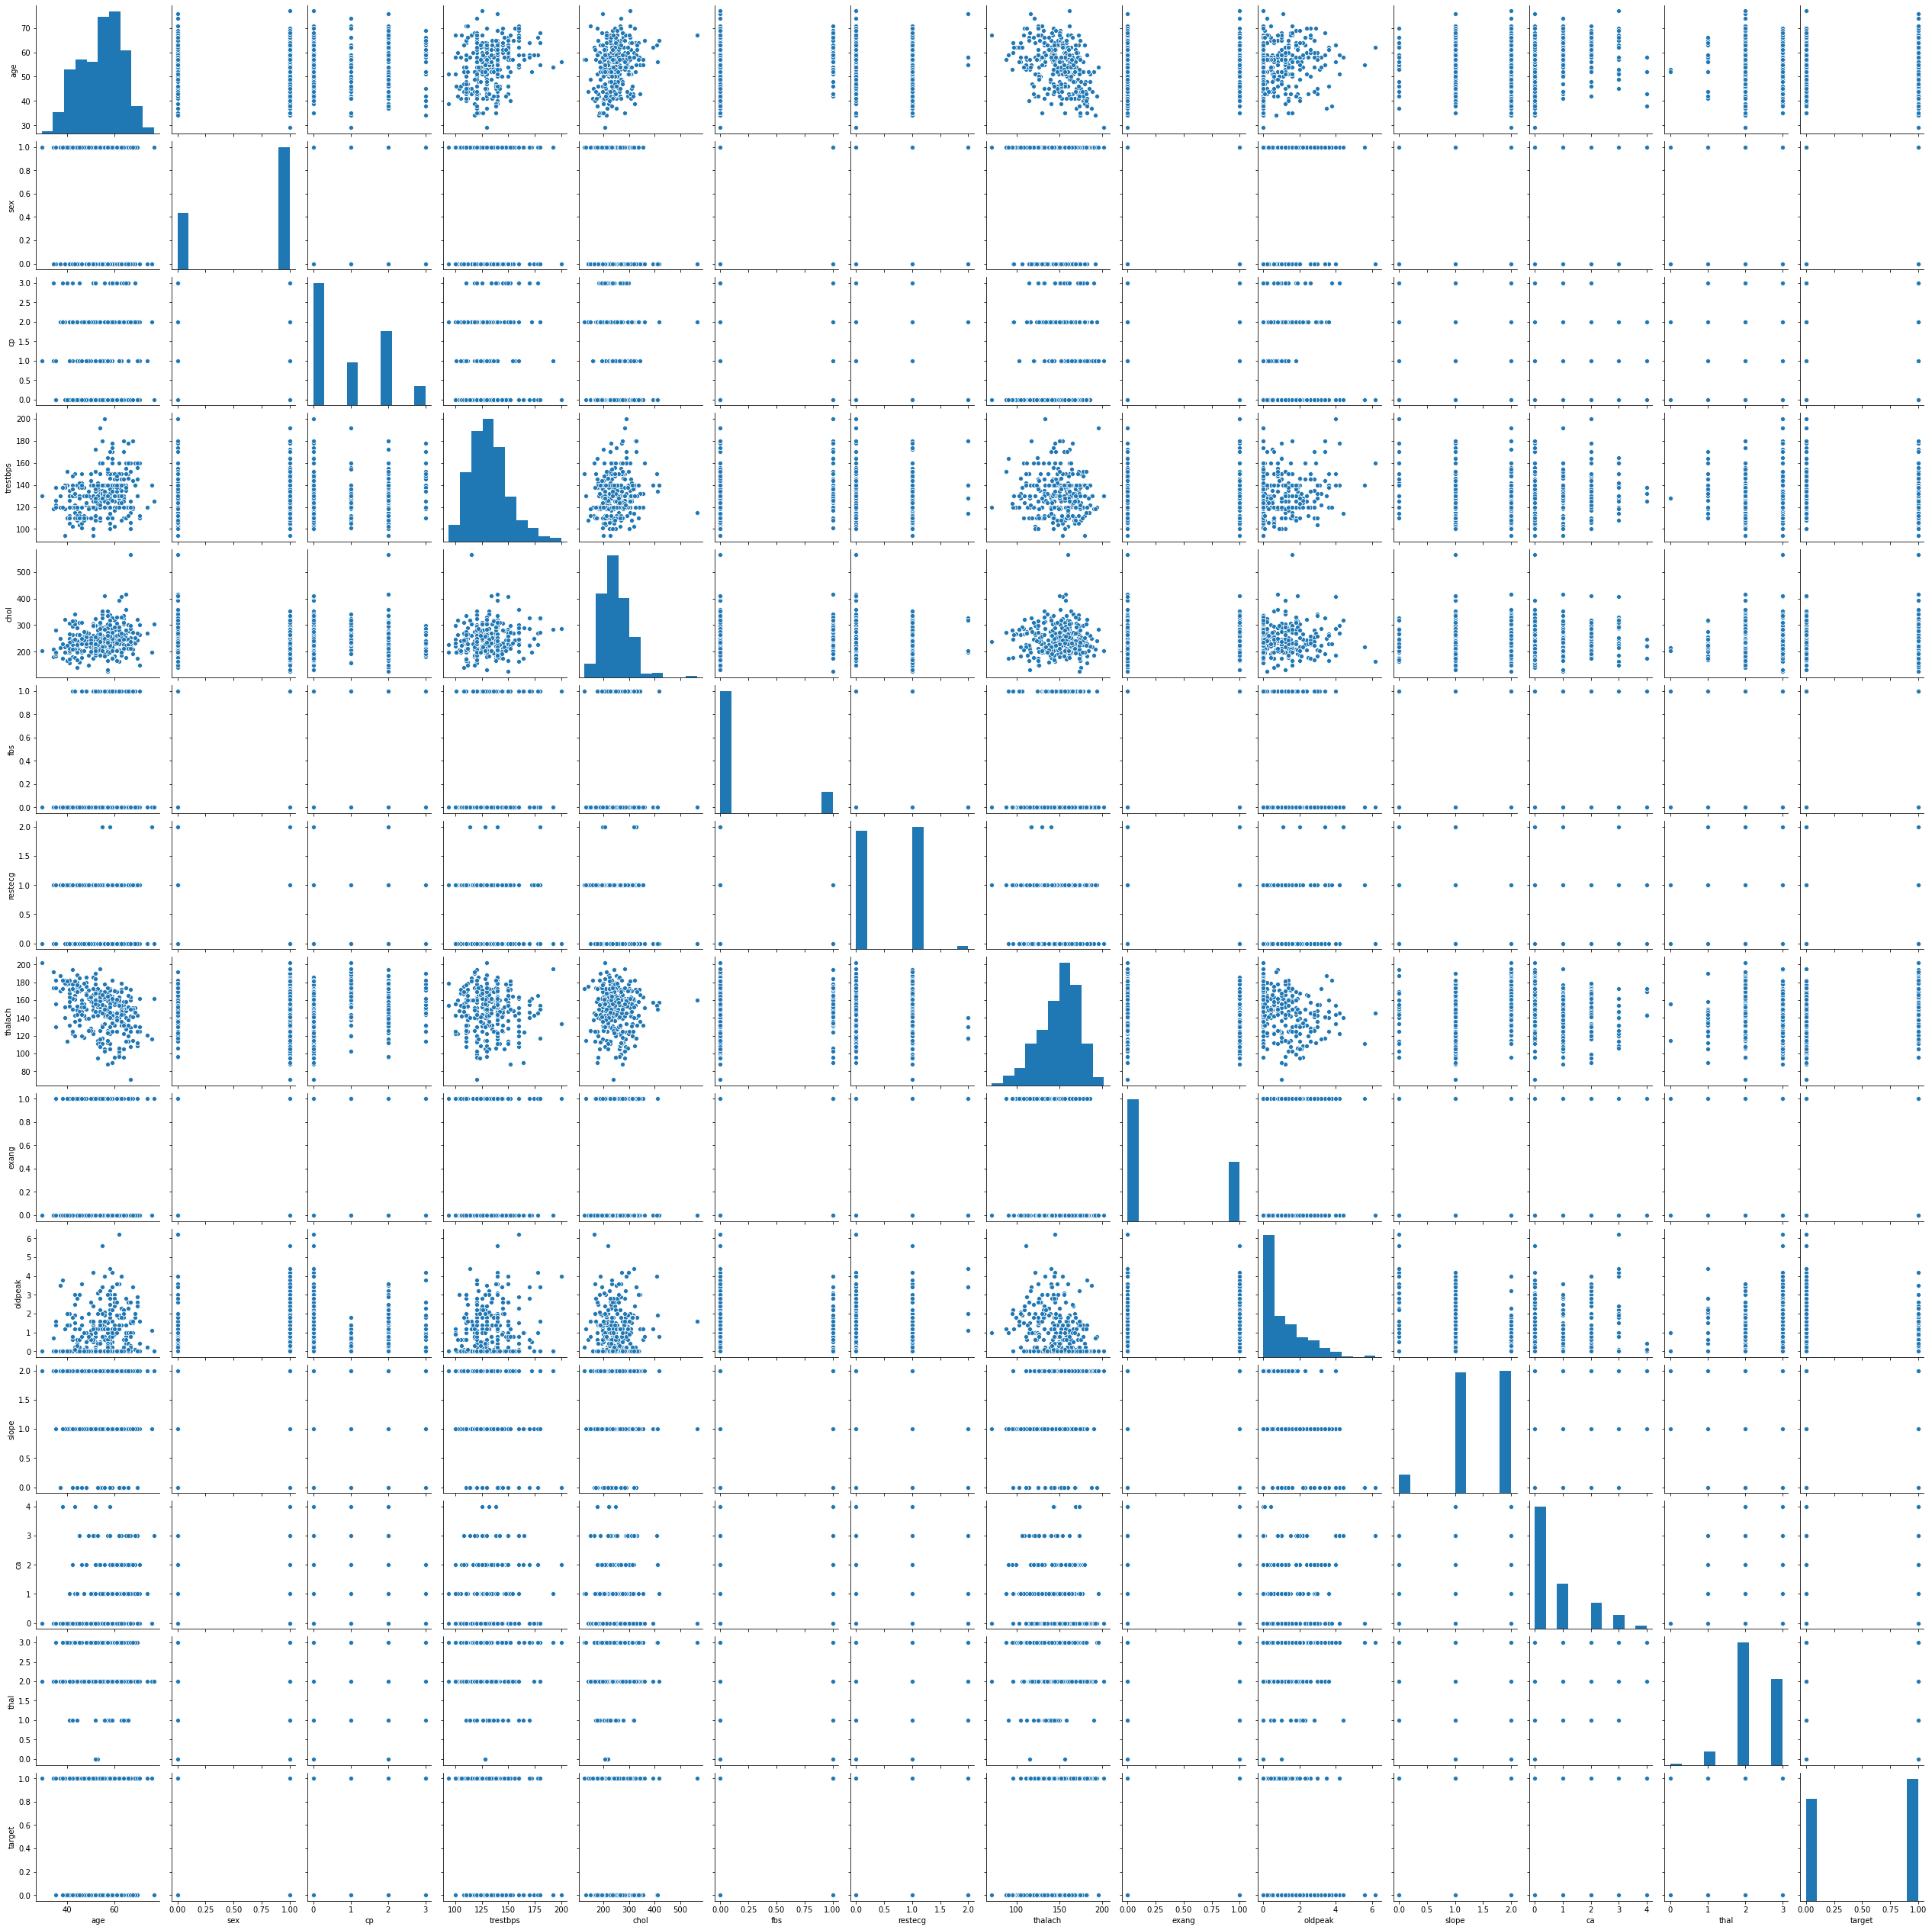

In [24]:
#visualization of the linear relation between different attributes through pairplot

plt.figure(figsize=(10,7))
sns.pairplot(df)

Observation:

Here we are observing that some attributes are related linearly in negative direction and in  positive direction as well.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEB0CFD130>,
      dtype=object)

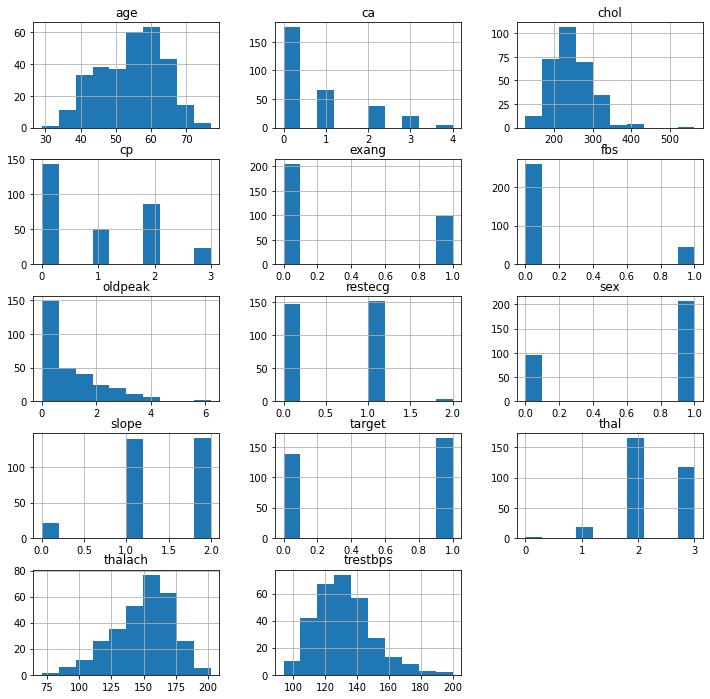

In [25]:
#plotting the histogram in order to check the distribution of data

df.hist(figsize=(12,12),layout=(5,3))

Observation:
    
1.Here it is observed that very high no. of chest pain who are not suffering from chest pain.

2.There is a huge no. who are not suffering from fasting blood sugar.

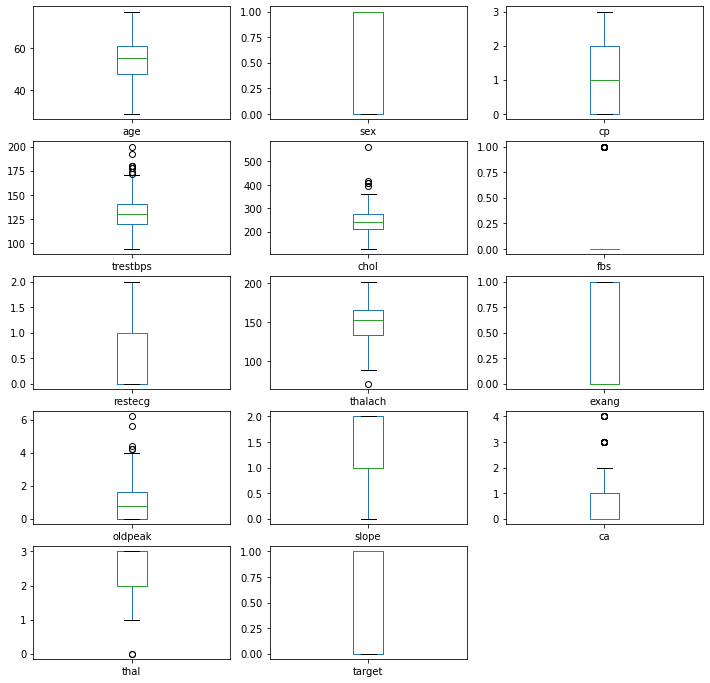

In [26]:
#Plotting boxplot
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

Observation:

Here we are observing that outliers are present in 'age','sex','cp','restecg','ca' and 'thal'

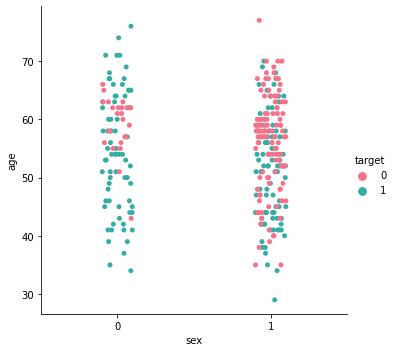

In [27]:
#Ploting category plot

sns.catplot(data=df,x='sex',y='age',hue='target',palette='husl')

Observation:

1.It is observed that more female are affected from heart disease as compared to male.

2.maximum age of female who are affected from heart disease is around 75.



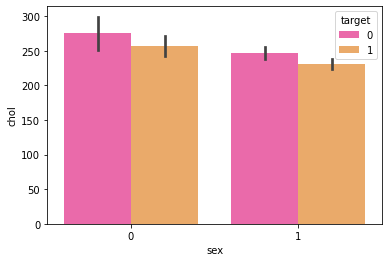

In [28]:
#Ploting barplot

sns.barplot(data=df,x='sex',y='chol',hue='target',palette='spring')

observation:

it is observed that in cholestrol level of female and male there is no so much difference.

In [29]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [30]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Observation:

There is 165 cases of heart disease and 138 cases of heart disease.

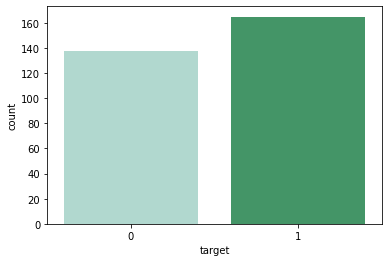

In [31]:
sns.countplot(x='target',palette='BuGn',data=df)

Observation:

Here it is observed that count for not having heart disease and having heart disease are almost balanced.

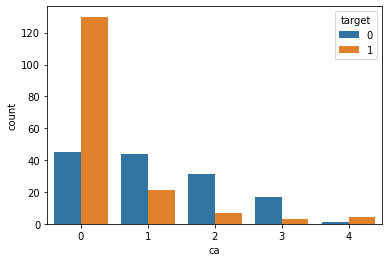

In [32]:
sns.countplot(x='ca',hue='target',data=df)

In [33]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

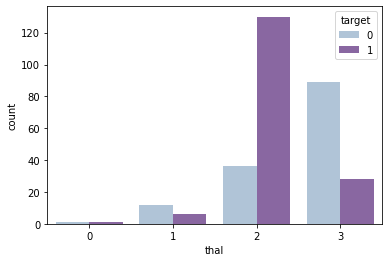

In [34]:
sns.countplot(x='thal',data=df,hue='target',palette='BuPu')

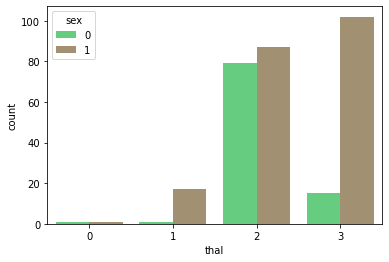

In [35]:
sns.countplot(x='thal',hue='sex',data=df,palette='terrain')

In [36]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

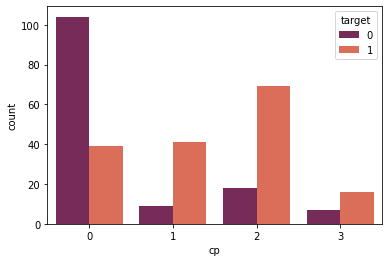

In [37]:
sns.countplot(x='cp',hue='target',data=df,palette='rocket')

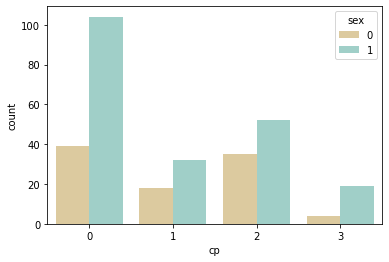

In [38]:
sns.countplot(x='cp',hue='sex',data=df,palette='BrBG')

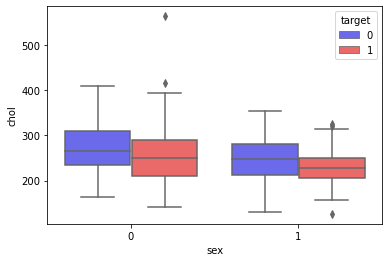

In [39]:
sns.boxplot(x='sex',y='chol',hue='target',palette='seismic',data=df)

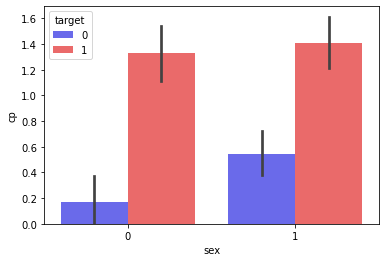

In [42]:
sns.barplot(x='sex',y='cp',hue='target',data=df,palette='seismic')

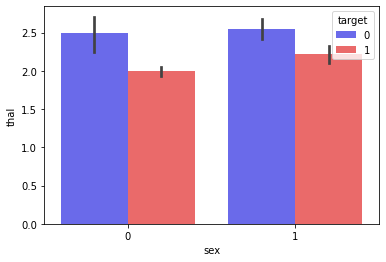

In [43]:
sns.barplot(x='sex',y='thal',data=df,hue='target',palette='seismic')

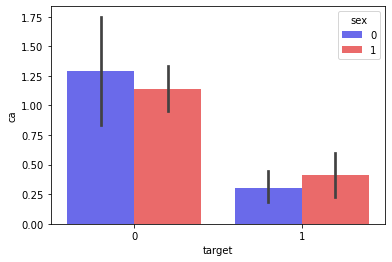

In [44]:
sns.barplot(x='target',y='ca',data=df,hue='sex',palette='seismic')

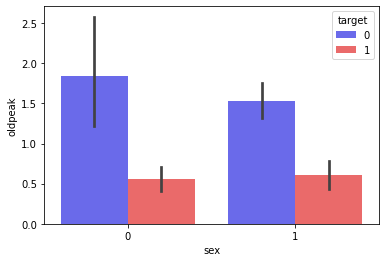

In [45]:
sns.barplot(x='sex',y='oldpeak',data=df,hue='target',palette='seismic')

In [46]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

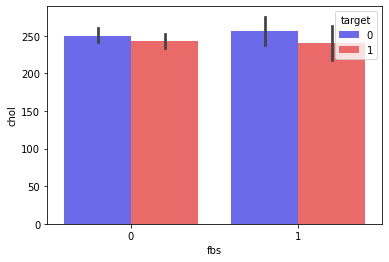

In [47]:
sns.barplot(x='fbs',y='chol',hue='target',data=df,palette='seismic')

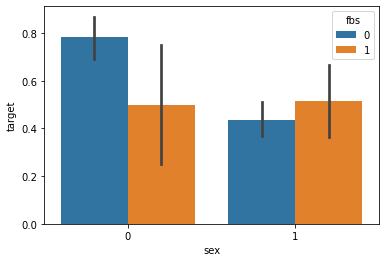

In [48]:
sns.barplot(x='sex',y='target',hue='fbs',data=df)

In [49]:
gen=pd.crosstab(df['sex'],df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


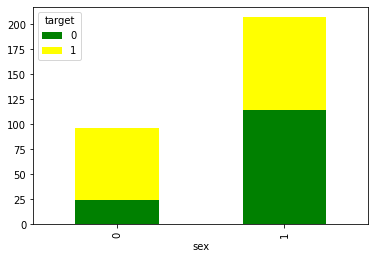

In [50]:
gen.plot(kind='bar',stacked=True,color=['green','yellow'],grid=False)

In [51]:
temp=pd.crosstab(index=df['sex'],
                columns=[df['thal']],
                margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


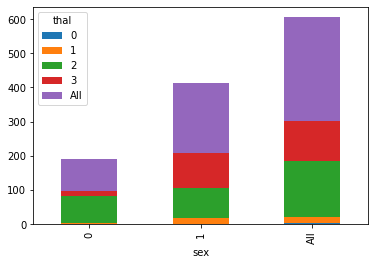

In [52]:
temp.plot(kind='bar',stacked=True)
plt.show()

In [53]:
temp=pd.crosstab(index=df['target'],
                columns=[df['thal']],
                margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,1,12,36,89,138
1,1,6,130,28,165
All,2,18,166,117,303


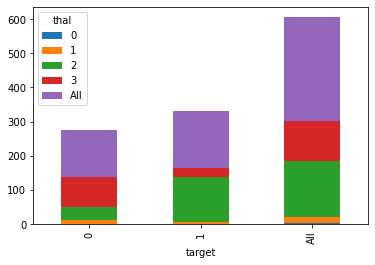

In [55]:
temp.plot(kind='bar',stacked=True)
plt.show()

In [56]:
chest_pain=pd.crosstab(df['cp'],df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


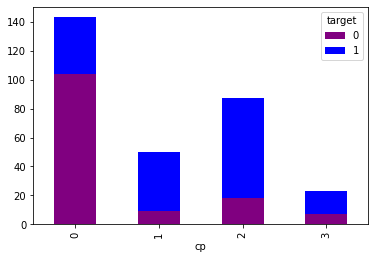

In [57]:
chest_pain.plot(kind='bar',stacked=True,color=['purple','blue'],grid=False)

# Model Building

Scaling the data

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [61]:
x=df.drop(['target'],axis=1)
y=df['target']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [63]:
#Applying Logistic Regression model

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

model1=lg.fit(x_train,y_train)
prediction1=model1.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

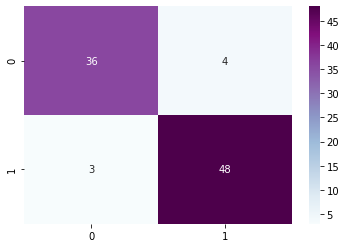

In [65]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [67]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



In [70]:
#Applying Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(x_train,y_train)
prediction2=model2.predict(x_test)
cm2=confusion_matrix(y_test,prediction2)

In [71]:
cm2

array([[34,  6],
       [17, 34]], dtype=int64)

In [72]:
accuracy_score(y_test,prediction2)

0.7472527472527473

In [73]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        40
           1       0.85      0.67      0.75        51

    accuracy                           0.75        91
   macro avg       0.76      0.76      0.75        91
weighted avg       0.77      0.75      0.75        91



In [75]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model3=rfc.fit(x_train,y_train)
prediction3=model3.predict(x_test)
confusion_matrix(y_test,prediction3)

array([[36,  4],
       [ 7, 44]], dtype=int64)

In [76]:
accuracy_score(y_test,prediction3)

0.8791208791208791

In [77]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        40
           1       0.92      0.86      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [78]:
#Applying SVM Model:

from sklearn.svm import SVC
svm= SVC()
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_test)
cm4=confusion_matrix(y_test,prediction4)

In [79]:
cm4

array([[33,  7],
       [ 2, 49]], dtype=int64)

In [80]:
accuracy_score(y_test,prediction4)

0.9010989010989011

In [84]:
#Applying GNB model:

from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
model5=NB.fit(x_train,y_train)
prediction5=model5.predict(x_test)
cm5=confusion_matrix(y_test,prediction5)

In [85]:
cm5

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [86]:
accuracy_score(y_test,prediction5)

0.8791208791208791

In [87]:
print('cm4',cm4)
print('------------')
print('cm5',cm5)

cm4 [[33  7]
 [ 2 49]]
------------
cm5 [[35  5]
 [ 6 45]]


In [90]:
#Applying KNN Model:

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
model6=KNN.fit(x_train,y_train)
prediction6=model6.predict(x_test)
cm6=confusion_matrix(y_test,prediction5)
cm6

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [91]:
accuracy_score(y_test,prediction6)

0.8351648351648352

In [92]:
print('Logistic Regression:',accuracy_score(y_test,prediction1))
print('Decision Tree:',accuracy_score(y_test,prediction2))
print('Random Forest:',accuracy_score(y_test,prediction3))
print('NB:',accuracy_score(y_test,prediction4))
print('SVC:',accuracy_score(y_test,prediction5))
print('KNN:',accuracy_score(y_test,prediction6))

Logistic Regression: 0.9230769230769231
Decision Tree: 0.7472527472527473
Random Forest: 0.8791208791208791
NB: 0.9010989010989011
SVC: 0.8791208791208791
KNN: 0.8351648351648352


Observation:

Best accuracy is given by Logistic Regression= 0.92